In [1]:
# %matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.pyplot import figure

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import datetime as dt
from datetime import datetime, date, time, timedelta
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect


In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Using the inspector to print the column names within the 'measurement' table and its types
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
# Print Measurement table first row
measurement_first_row = session.query(Measurement).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25a879708c8>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [12]:
# Using the inspector to print the column names within the 'station' table and its types
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [13]:
# print Station table first row
measurement_first_row = session.query(Station).first()
measurement_first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x25a87a02c08>,
 'latitude': 21.2716,
 'id': 1,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168}

# Exploratory Climate Analysis

## Measurement Analysis

###  Design a query to retrieve the last 12 months of precipitation data and plot the results

In [14]:
# Latest Date in DataFrame
last_date_query = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

last_date= datetime.strptime(last_date_query[0],"%Y-%m-%d").date()
print(f"Last date in the data base is: {last_date}")  # outputs date as string

Last date in the data base is: 2017-08-23


In [15]:
# Calculate the date 1 year ago from the last data point in the database
date_12months_ago = last_date - relativedelta(months= 12)
print(f"Last date in the data base is: {date_12months_ago}")

Last date in the data base is: 2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores
last_12months_prcp_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= date_12months_ago).\
    order_by(Measurement.date).all()
last_12months_prcp_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column
last_12months_prcp_data_df= pd.DataFrame(last_12months_prcp_data, columns = ['Date','Precipitation'])
# Sort the dataframe by date
last_12months_prcp_data_df.set_index("Date", inplace=True,)
last_12months_prcp_data_df.dropna(inplace=True)
last_12months_prcp_data_df


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [18]:
last_12months_prcp_data_df.sort_index(inplace=True,)

last_12months_prcp_data_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


In [19]:

# check precipitation min and max
min = last_12months_prcp_data_df['Precipitation'].min()
max = last_12months_prcp_data_df['Precipitation'].max()

min, max

(0.0, 6.7)

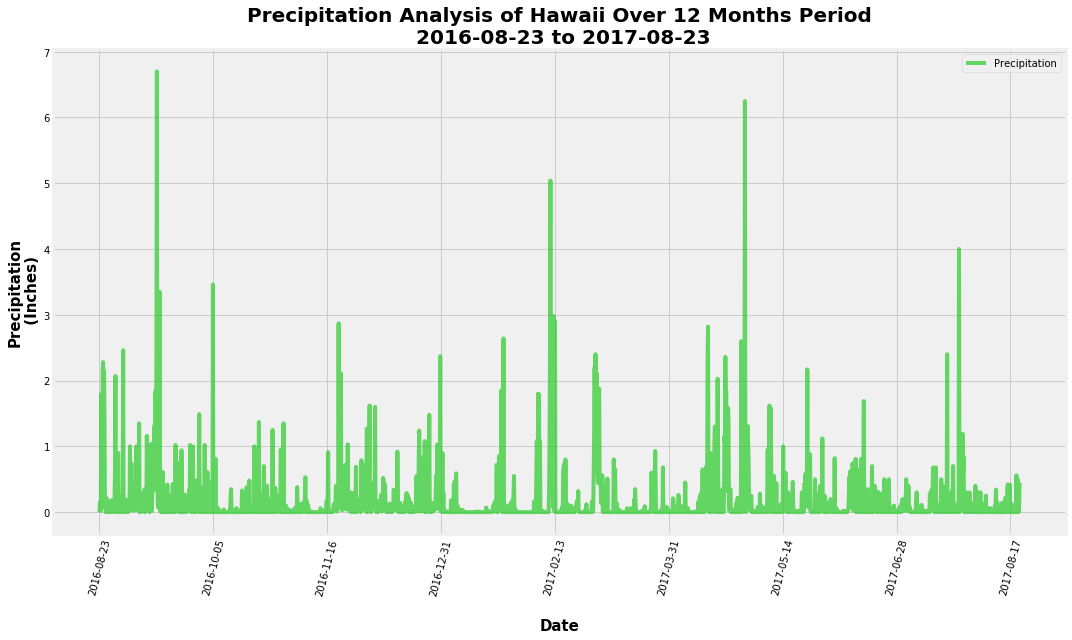

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_plot = last_12months_prcp_data_df.plot(kind="line", figsize=(15,9), rot=75, color="limegreen", alpha=0.75)
plt.legend(loc='upper right')
prcp_plot.set_ylabel("Precipitation\n (Inches)", weight="bold", size=15)
prcp_plot.set_xlabel("\nDate", weight="bold", size=15)
prcp_plot.set_title("Precipitation Analysis of Hawaii Over 12 Months Period\n 2016-08-23 to 2017-08-23", weight="bold", size=20);
# plot.grid()
plt.tight_layout()
plt.savefig("Images/PrecipitationOver12Months.png")


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Is it for one year data or all precipitation data from Measurement table?
# For One Year - Use Pandas to calcualte the summary statistics for the precipitation data
last_12months_prcp_data_df['Precipitation'].describe()


count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [22]:
#all precipitation data from Measurement table -Use Pandas to calcualte the summary statistics for the precipitation data

# all_prec_data = engine.execute('SELECT date, prcp FROM measurement').fetchall()
# all_prec_data_df = pd.DataFrame(all_prec_data)
# all_prec_data_df.describe()

## Station Analysis

In [23]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Measurement.station).distinct().count()
stations_count

print(f"---- There are {stations_count} available stations in Hawaii ----")

---- There are 9 available stations in Hawaii ----


In [24]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

select = [Measurement.station, func.count(Measurement.station), Station.name]
active_stations = session.query(*select).\
    filter(Station.station == Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations



[('USC00519281', 2772, 'WAIHEE 837.5, HI US'),
 ('USC00519397', 2724, 'WAIKIKI 717.2, HI US'),
 ('USC00513117', 2709, 'KANEOHE 838.1, HI US'),
 ('USC00519523', 2669, 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 ('USC00516128', 2612, 'MANOA LYON ARBO 785.2, HI US'),
 ('USC00514830', 2202, 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 ('USC00511918', 1979, 'HONOLULU OBSERVATORY 702.2, HI US'),
 ('USC00517948', 1372, 'PEARL CITY, HI US'),
 ('USC00518838', 511, 'UPPER WAHIAWA 874.3, HI US')]

In [25]:
active_stations_data = pd.DataFrame(data= active_stations, columns =["Station ID","Count of Active Stations", "Station Name/Location"])

#active_stations_data = active_stations.sort_values(by= "Count of Active Stations", ascending=False)

active_stations_data

,Station ID,Count of Active Stations,Station Name/Location
0,USC00519281,2772,"WAIHEE 837.5, HI US"
1,USC00519397,2724,"WAIKIKI 717.2, HI US"
2,USC00513117,2709,"KANEOHE 838.1, HI US"
3,USC00519523,2669,"WAIMANALO EXPERIMENTAL FARM, HI US"
4,USC00516128,2612,"MANOA LYON ARBO 785.2, HI US"
5,USC00514830,2202,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
6,USC00511918,1979,"HONOLULU OBSERVATORY 702.2, HI US"
7,USC00517948,1372,"PEARL CITY, HI US"
8,USC00518838,511,"UPPER WAHIAWA 874.3, HI US"


In [26]:
# if station id is not given, then from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# most_active_station = active_stations[0][0]
# print(most_active_station)
# station_record = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
#      filter(Measurement.station == active_stations[0][0]).all()
# station_record

### If we did not query above or most active station number is not given, then we would find aggregates count, min, max,avg using func & "*select"

most_active_station_record = active_stations[0]
print(f"Most active Station Record is:  {most_active_station_record}")


most_active_station = active_stations[0][0]
print(f"Most active Station ID is:  {most_active_station}")

select = [func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)]
most_active_station_temp = session.query(*select).\
    filter(Measurement.station == active_stations[0][0]).all()
most_active_station_temp


# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# select = [func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]

# active_station_temp = session.query(*select).\
#     filter(Measurement.station == "USC00519281").all()

#outputs min, max & avg temp of statiton = "USC00519281"
#active_station_temp

Most active Station Record is:  ('USC00519281', 2772, 'WAIHEE 837.5, HI US')
Most active Station ID is:  USC00519281


[(54.0, 85.0, 71.66378066378067)]

In [27]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

last_12months_temp_obs_data_df = session.query(Measurement.tobs).\
    filter(Measurement.date >= date_12months_ago).\
    filter(Measurement.station == most_active_station).\
    order_by(Measurement.date).all()

last_12months_temp_obs_data_df



[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [28]:
# Save the Query Results as a Pandas DataFrame
last_12months_temp_obs_data_df = pd.DataFrame(last_12months_temp_obs_data_df, columns=["TempObs"])
last_12months_temp_obs_data_df.dropna(inplace=True)
last_12months_temp_obs_data_df

,TempObs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


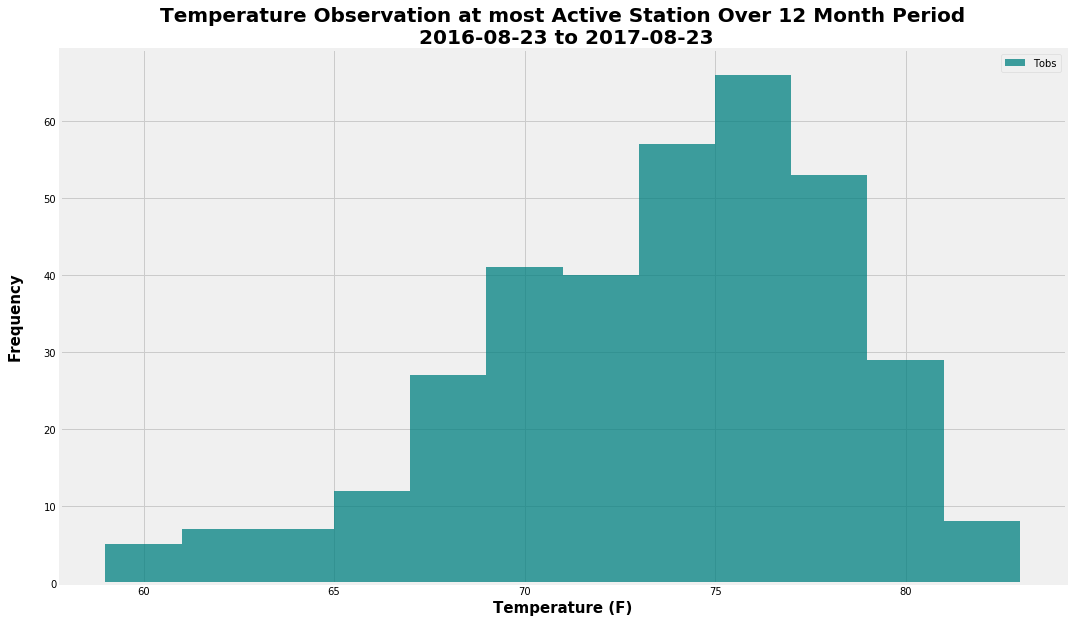

In [29]:
# Save the Query Results as a Pandas DataFrame

# Plot the Results as a Histogram with `bins=12`
fig,ax2 = plt.subplots(figsize = (15,9))
ax2.set_ylabel("Frequency\n", fontsize = 15, weight="bold")
ax2.set_xlabel("Temperature (F)\n", fontsize = 15, weight="bold")
ax2.set_title("Temperature Observation at most Active Station Over 12 Month Period\n 2016-08-23 to 2017-08-23", fontsize = 20, weight="bold")
ax2.hist(last_12months_temp_obs_data_df['TempObs'], bins=12, density=False, alpha=0.75, color = "teal")
plt.legend(['Tobs'], loc="upper right")

plt.tight_layout()
plt.savefig("Images/TempVsFreqHistogram.png")


## Bonus Challenge Assignment

### Temperature Analysis I        

In [30]:
# Comparing temperatures between June and December
june_str = "06"
december_str = "12"
june_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == june_str).all()
june_avg_temp = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == june_str).all()
print(f"June Average Temperature:  {june_avg_temp[0][0]}")
december_temperatures = session.query(Measurement.tobs).filter(func.strftime("%m", Measurement.date) == december_str).all()
december_avg_temp = session.query(func.avg(Measurement.tobs)).filter(func.strftime("%m", Measurement.date) == december_str).all()
print(f"December Average Temperature:  {december_avg_temp[0][0]}")
print("-----------------------------------------------------------------------------------------------------------------")
print(stats.ttest_ind(june_temperatures, december_temperatures, equal_var=False))
print("The average temperatures for June and December in Hawaii have no statistical significance. Since p-value os less then significance level at 5%, we can conclude that there is a difference between average temperaturesof June & December ")
print("The T-Test used is an Unpaired T-Test because the two temperatures are independent of each other.")

#  Do temperature differ significantly if the temperature is taken in June or December?
#  Alternative hypothesis (HA): u1 = u2, which translates to the mean temperature of June is equal to the mean temperature of December at 5% Sig level.
# Null hypothesis (HA): u1 =/ u2, which translates to the mean temperature of June is not equal to the mean temperature of December at 5% Sig level.
# If p-value is less than significance level 5% then we reject null Hypotheis

June Average Temperature:  74.94411764705882
December Average Temperature:  71.04152933421226
-----------------------------------------------------------------------------------------------------------------
Ttest_indResult(statistic=array([31.35503692]), pvalue=array([4.19352984e-187]))
The average temperatures for June and December in Hawaii have no statistical significance. Since p-value os less then significance level at 5%, we can conclude that there is a difference between average temperaturesof June & December 
The T-Test used is an Unpaired T-Test because the two temperatures are independent of each other.


##### Conclusion:
The unpaired T-test is used because the two temperatures are independent of each other. As you can observe that p-value is way small than 5% significance level. We reject null hypotheis and the temperatures for June and Decemebr in Hawaii have no statistical significance at 5% level.


### Temperature Analysis II

In [31]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [32]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2016-10-28', '2016-11-05')

[(68.0, 75.85964912280701, 79.0)]

In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

trip_start_date = '2016-10-28'
trip_end_date = '2016-11-05'

trip_start_date = datetime.strptime("2016-10-28", "%Y-%m-%d").date()
trip_end_date = datetime.strptime("2016-11-05", "%Y-%m-%d").date()
print(f"Trip dates {trip_start_date} to {trip_end_date}")

avg_temp = calc_temps(trip_start_date, trip_end_date)[0][1]
print(f"\nTrip Average Temperature: {avg_temp} Farenheit")

min_temp = calc_temps(trip_start_date, trip_end_date)[0][0]
print(f"\nTrip Minimum Temperature: {min_temp} Farenheit")

max_temp = calc_temps(trip_start_date, trip_end_date)[0][2]
print(f"\nTrip Maximum Temperature: {max_temp} Farenheit")

#print(avg_temp, min_temp , max_temp)




Trip dates 2016-10-28 to 2016-11-05

Trip Average Temperature: 75.85964912280701 Farenheit

Trip Minimum Temperature: 68.0 Farenheit

Trip Maximum Temperature: 79.0 Farenheit


Trip dates 2016-10-28 to 2016-11-05


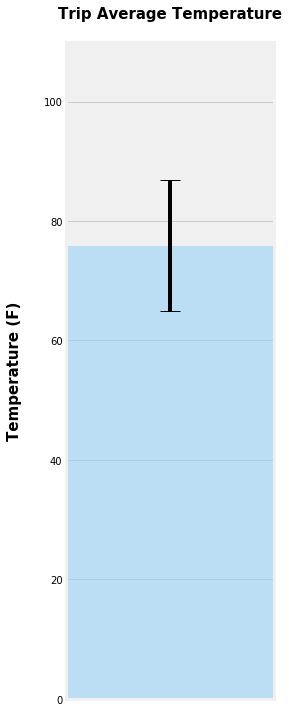

In [34]:

# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

trip_start_date = datetime.strptime("2016-10-28", "%Y-%m-%d").date()
trip_end_date = datetime.strptime("2016-11-05", "%Y-%m-%d").date()
print(f"Trip dates {trip_start_date} to {trip_end_date}")

avg_temp = calc_temps(trip_start_date, trip_end_date)[0][1]
min_temp = calc_temps(trip_start_date, trip_end_date)[0][0]
max_temp = calc_temps(trip_start_date, trip_end_date)[0][2]

# create bar graph
fig,ax3 = plt.subplots(figsize = (4,10))
ax3.set_ylabel("Temperature (F)\n", fontsize = 15, weight="bold")
ax3.set_title("Trip Average Temperature\n", fontsize = 15, weight="bold")
ax3.bar(0, avg_temp, width=0.10, capsize =10, alpha=0.5, color='lightskyblue', yerr = (max_temp - min_temp))
ax3.set_xlim(0,5)
ax3.set_ylim(0,110)
ax3.set_xbound(lower=-0.05, upper=.05)
ax3.set_xticks([])
plt.tight_layout()
plt.savefig("Images/TripAverageTemperature.png")



### Temperature Analysis III ----- Daily Rainfall Average

In [35]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

sel = [Measurement.station, func.sum(Measurement.prcp).label("Total Rainfall"),\
       Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation
      ]
station_total_rainfall = session.query(*sel).\
        filter(Station.station == Measurement.station).\
        filter(Measurement.date >= trip_start_date).\
        filter(Measurement.date <= trip_end_date).\
        group_by(Measurement.station).\
        order_by(func.sum(Measurement.prcp).desc()).all()

station_total_rainfall_df = pd.DataFrame(station_total_rainfall)
station_total_rainfall_df




,station,Total Rainfall,station,name,latitude,longitude,elevation
0,USC00516128,3.51,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
1,USC00519281,0.51,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
2,USC00514830,0.47,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
3,USC00519397,0.27,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
4,USC00519523,0.23,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00513117,0.20,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
6,USC00517948,NaN,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9


In [36]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [37]:

# My Trip dates are chosen below
trip_start_date = datetime.strptime("2016-10-28", "%Y-%m-%d").date()
trip_end_date = datetime.strptime("2016-11-05", "%Y-%m-%d").date()
print(f"Trip dates {trip_start_date} to {trip_end_date}")

Trip dates 2016-10-28 to 2016-11-05


In [38]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
trip_start_date = datetime.strptime("2016-10-28", "%Y-%m-%d").date()
trip_end_date = datetime.strptime("2016-11-05", "%Y-%m-%d").date()
print(f"Trip dates {trip_start_date} to {trip_end_date}")

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date
# Temperature daily normals dictionary for trip dates\n",
dates_list = session.query(Measurement.date).\
filter(Measurement.date >= trip_start_date).\
filter(Measurement.date <= trip_end_date).\
group_by(Measurement.date).all()

trip_date = [x[0] for x in dates_list]

# Stip off the year and save a list of %m-%d strings
trip_date_stip = [x[5:] for x in trip_date]

first_trip_date = trip_date_stip[0]

last_trip_date = trip_date_stip[-1]

# Loop through the list of %m-%d strings and calculate the normals for each date
trip_daily_normals = [session.query(func.min(Measurement.tobs),
                        func.avg(Measurement.tobs),
                        func.max(Measurement.tobs)).\
                        filter(func.strftime("%m-%d", Measurement.date) >= first_trip_date).\
                        filter(func.strftime("%m-%d", Measurement.date) <= last_trip_date).\
                        group_by(func.strftime("%m-%d", Measurement.date)).all()]

trip_daily_normals

Trip dates 2016-10-28 to 2016-11-05


[[(68.0, 74.75471698113208, 82.0),
  (68.0, 74.88679245283019, 81.0),
  (64.0, 74.66, 81.0),
  (67.0, 74.83673469387755, 80.0),
  (65.0, 74.86274509803921, 83.0),
  (64.0, 74.0625, 81.0),
  (66.0, 74.95918367346938, 82.0),
  (65.0, 74.0754716981132, 82.0),
  (64.0, 73.5576923076923, 78.0)]]

In [39]:
trip_daily_normals = trip_daily_normals[0]

trip_daily_normals

[(68.0, 74.75471698113208, 82.0),
 (68.0, 74.88679245283019, 81.0),
 (64.0, 74.66, 81.0),
 (67.0, 74.83673469387755, 80.0),
 (65.0, 74.86274509803921, 83.0),
 (64.0, 74.0625, 81.0),
 (66.0, 74.95918367346938, 82.0),
 (65.0, 74.0754716981132, 82.0),
 (64.0, 73.5576923076923, 78.0)]

In [40]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Trip Daily Normals in Pandas DataFrame

trip_daily_normals_df = pd.DataFrame(trip_daily_normals, columns=["Temperature_Min", "Temperature_Avg", "Temperature_Max"])

trip_daily_normals_df

,Temperature_Min,Temperature_Avg,Temperature_Max
0,68.0,74.754717,82.0
1,68.0,74.886792,81.0
2,64.0,74.660000,81.0
3,67.0,74.836735,80.0
4,65.0,74.862745,83.0
5,64.0,74.062500,81.0
6,66.0,74.959184,82.0
7,65.0,74.075472,82.0
8,64.0,73.557692,78.0


In [41]:
#add the `trip_dates` range as the `date` index in the data frame

trip_daily_normals_df["date"] = trip_date
trip_daily_normals_df["date"] = pd.to_datetime(trip_daily_normals_df["date"], format="%Y-%m-%d")

# trip_daily_normals_df.set_index("date", inplace=True)
# trip_daily_normals_df

trip_daily_normals_clean_df = trip_daily_normals_df.rename(columns={"date" : "Date"})
trip_daily_normals_clean_df.set_index("Date", inplace=True)
trip_daily_normals_clean_df

,Temperature_Min,Temperature_Avg,Temperature_Max
Date,,,
2016-10-28,68.0,74.754717,82.0
2016-10-29,68.0,74.886792,81.0
2016-10-30,64.0,74.660000,81.0
2016-10-31,67.0,74.836735,80.0
2016-11-01,65.0,74.862745,83.0
2016-11-02,64.0,74.062500,81.0
2016-11-03,66.0,74.959184,82.0
2016-11-04,65.0,74.075472,82.0
2016-11-05,64.0,73.557692,78.0


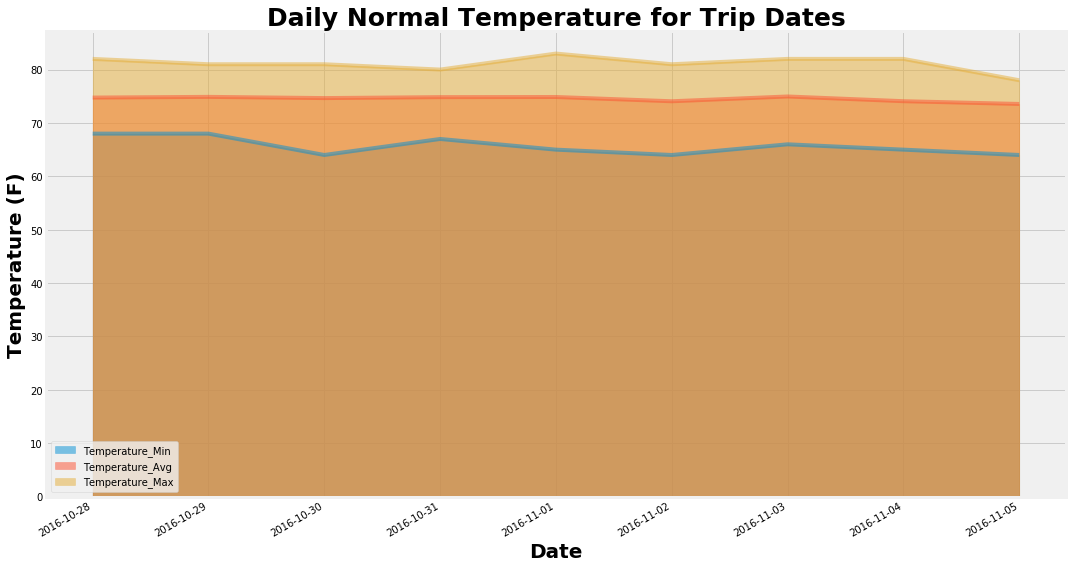

In [44]:
# Use Pandas to Plot the daily normals as an area plot with `stacked=False`
trip_daily_normals_clean_df.plot(kind='area', alpha=0.5,stacked=False, x_compat=True, title="Daily Normal Temperature for Trip Dates", figsize=(15,8))
plt.title("Daily Normal Temperature for Trip Dates", fontsize = 25, weight="bold")
plt.ylabel("Temperature (F)",fontsize = 20, weight="bold")
plt.xlabel("Date",fontsize = 20, weight="bold")
plt.tight_layout()
plt.savefig("Images/DailyRainfallAverage.png")